In [14]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Data Exploration and Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('Alphabets_data.csv')
df.head(10)

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   
5      S     4    11      5       8      3     8     8      6      9      5   
6      B     4     2      5       4      4     8     7      6      6      7   
7      A     1     1      3       2      1     8     2      2      2      8   
8      J     2     2      4       4      2    10     6      2      6     12   
9      M    11    15     13       9      7    13     2      6      2     12   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  
5       6       6      0       8      9       7  
6       6       6      2       8      7      10  
7       2       8      1       6      2       7  
8       4       8      1       6      1       7  
9       1       9      8       1      1       8

In [3]:
# Total list of columns
print(df.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [4]:
# Total no.of rows and columns
df.shape

(20000, 17)

In [5]:
# Check for missing values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
# Describe the dataset
df.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [7]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


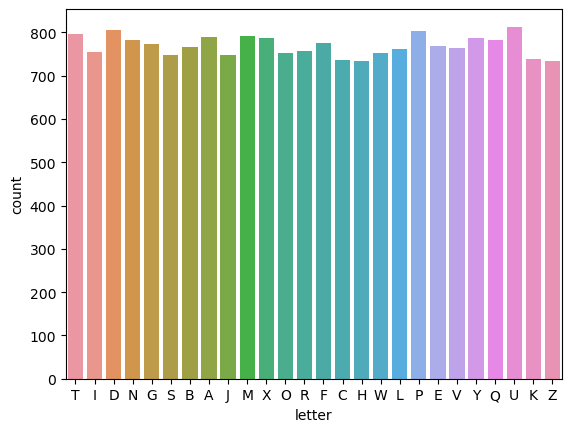

In [8]:
# Check distribution of target classes
sns.countplot(x="letter", data=df)
plt.show()

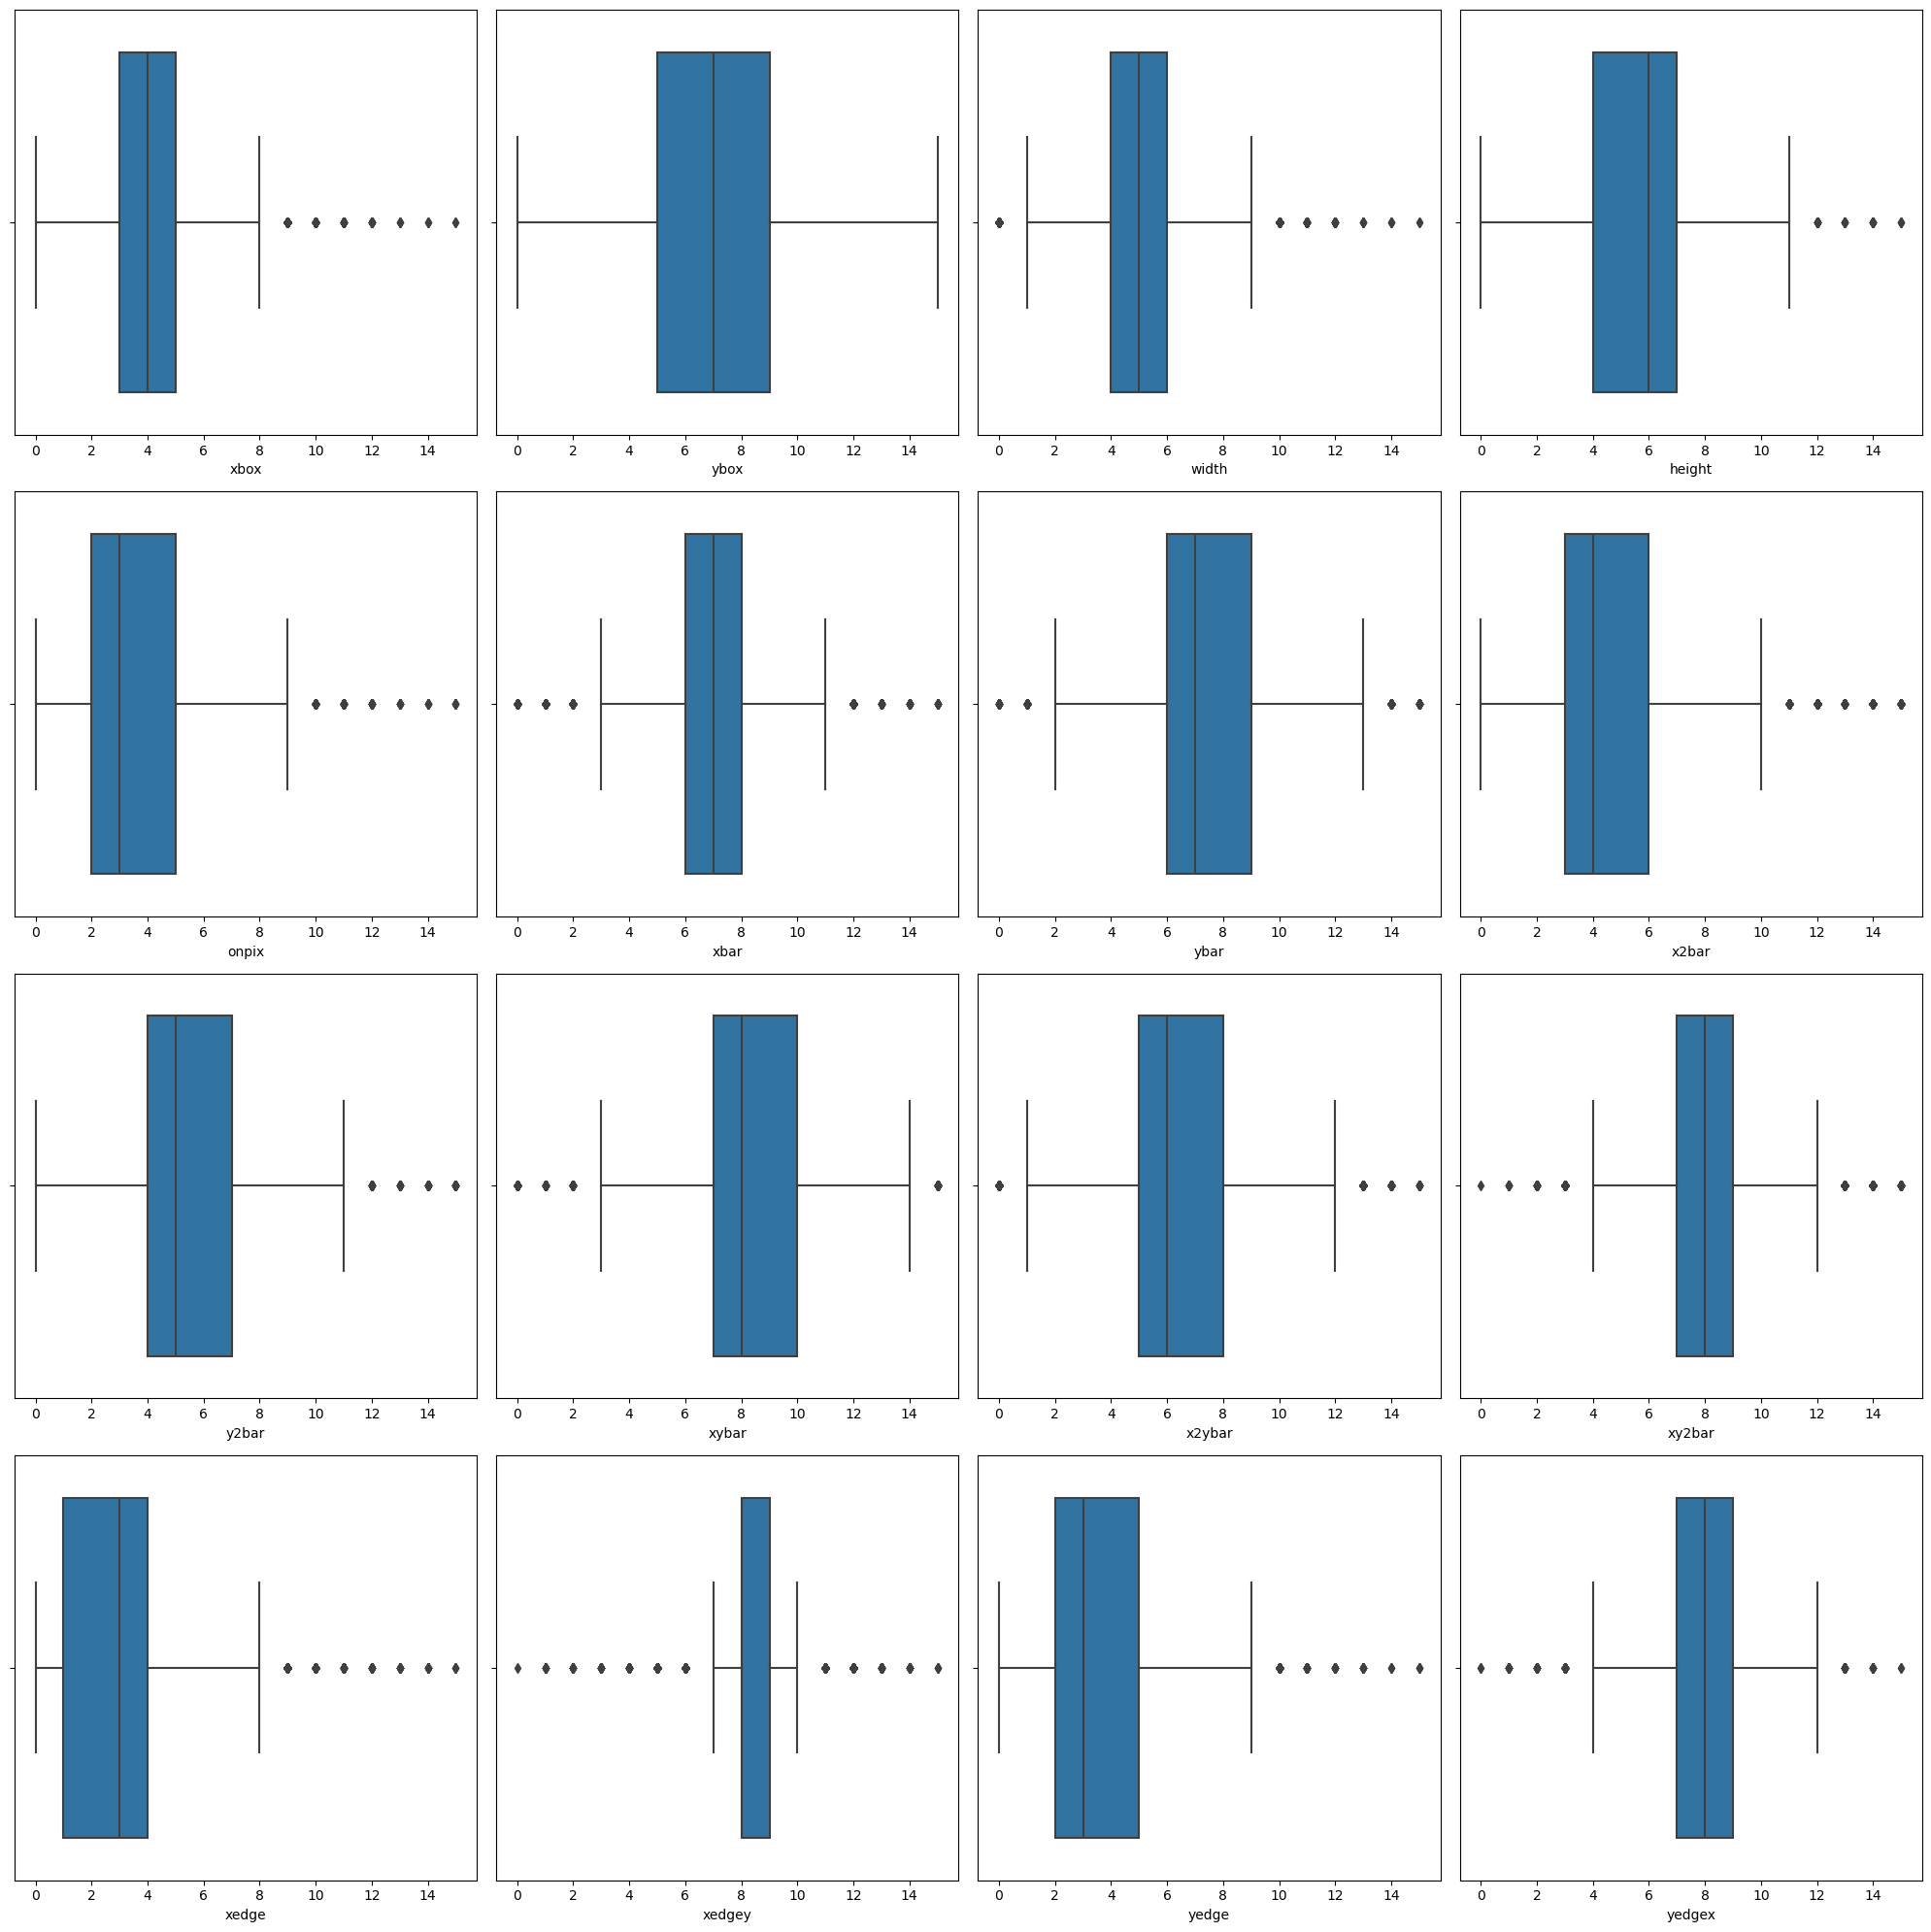

In [9]:
# Plotting boxplots to check the distribution of numerical columns
cols = df.columns[1:].tolist()  # Exclude the last column
fig, ax = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows, 4 columns for the subplots
r = c = 0
for col in cols:
    sns.boxplot(x=col, data=df, ax=ax[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

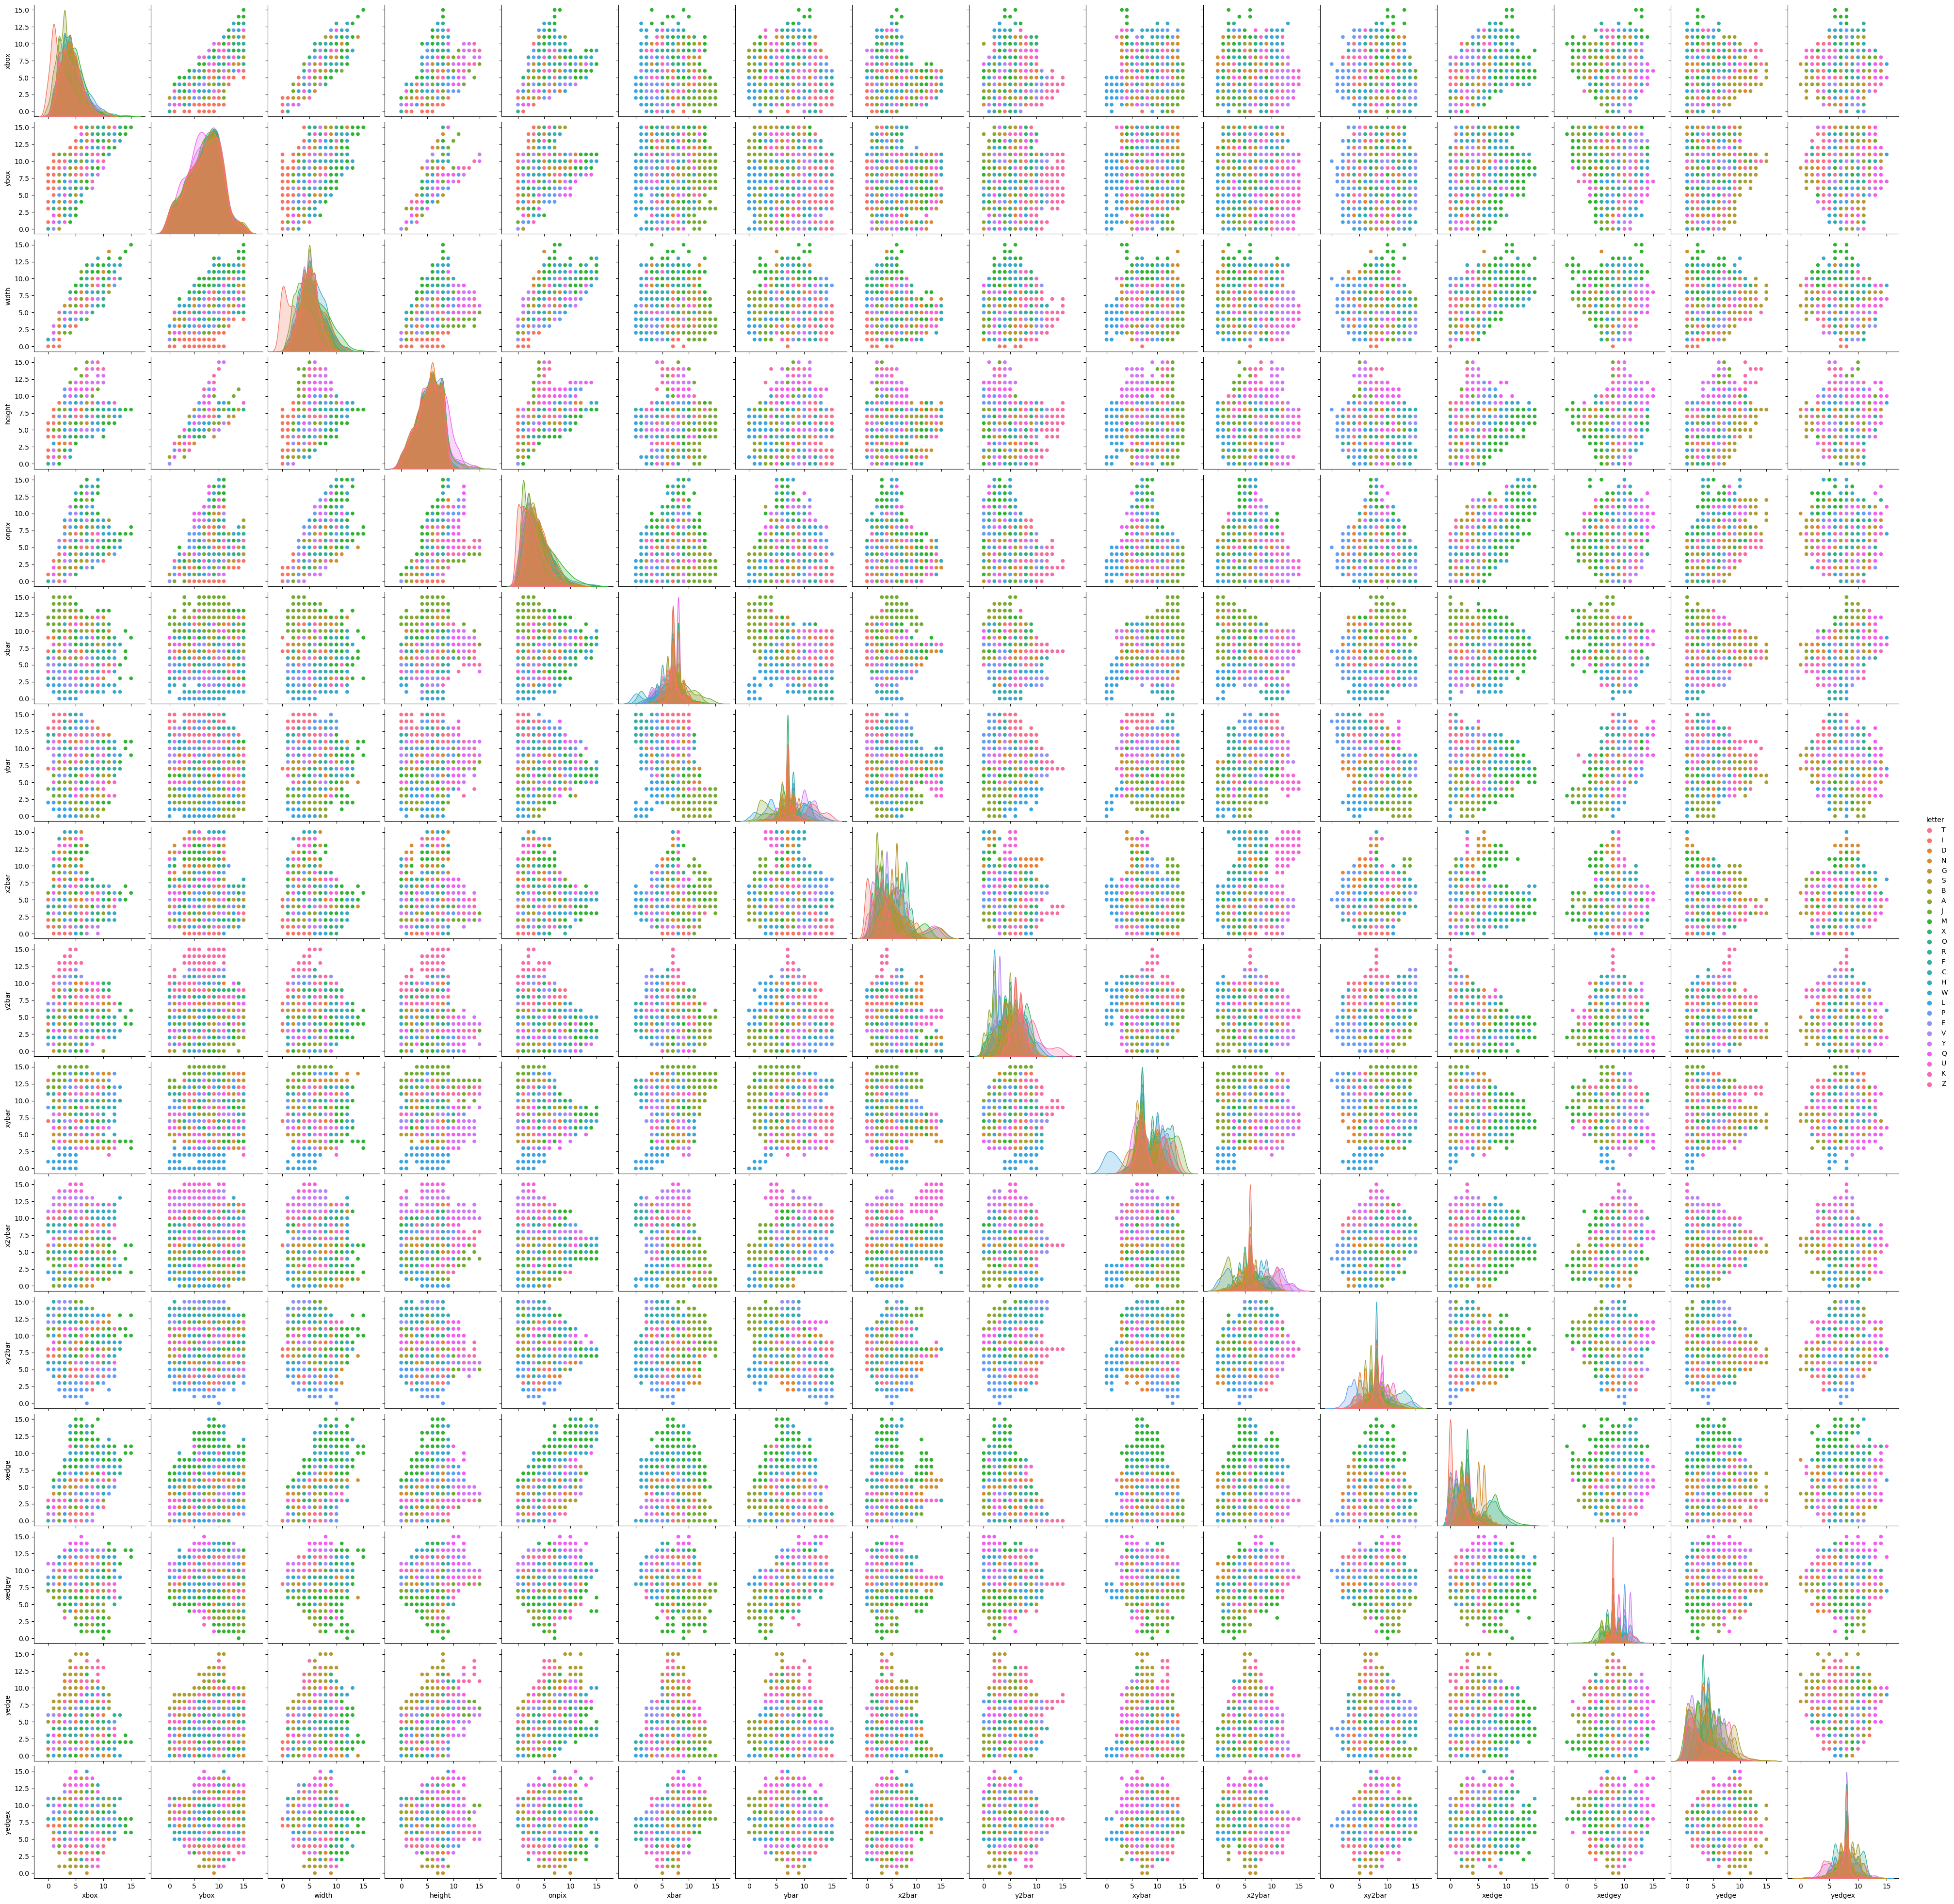

In [10]:
# Visualizing numerical columns clustered based on species
sns.pairplot(df,hue='letter')

## Model Implementation

In [11]:
# Split the dataset into features and target variables
X = df.drop("letter", axis=1)

# Encode target variable (convert strings to integers for classification)
le = LabelEncoder()
y = le.fit_transform(df["letter"])

In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(units=len(df['letter'].unique()), activation="softmax"))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1902 - loss: 3.1301 - val_accuracy: 0.5350 - val_loss: 1.6138
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5872 - loss: 1.4912 - val_accuracy: 0.6808 - val_loss: 1.2273
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6779 - loss: 1.2058 - val_accuracy: 0.7218 - val_loss: 1.0762
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7156 - loss: 1.0683 - val_accuracy: 0.7410 - val_loss: 0.9858
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7402 - loss: 0.9783 - val_accuracy: 0.7517 - val_loss: 0.9360
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7426 - loss: 0.9408 - val_accuracy: 0.7575 - val_loss: 0.8972
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7594 - loss: 0.8851 - val_accuracy: 0.7735 - val_loss: 0.8630
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7623 - loss: 0.8637 - val_accuracy: 0.

## Hyperparameter Tuning and Evaluation

In [13]:
# Hypertuning and Evalution
X = df.drop("letter", axis=1)
le = LabelEncoder()
y = le.fit_transform(df["letter"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model creation class
class CustomModel:
    def __init__(self, num_hidden_layers, neurons_per_layer, activation, dropout_rate):
        self.num_hidden_layers = num_hidden_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.model = None  # Initialize model attribute

    def build_model(self, input_shape):
        self.model = Sequential()
        self.model.add(Dense(units=self.neurons_per_layer, activation=self.activation, input_shape=input_shape))
        self.model.add(Dropout(self.dropout_rate))
        for _ in range(self.num_hidden_layers - 1):
            self.model.add(Dense(units=self.neurons_per_layer, activation=self.activation))
            self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(units=len(df['letter'].unique()), activation="softmax"))
        self.model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

    def fit(self, X, y, epochs=10, batch_size=32, validation_data=None):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_data=validation_data)

    def score(self, X, y):
        y_pred = self.model.predict(X)
        y_pred_classes = np.argmax(y_pred, axis=1)
        return accuracy_score(y, y_pred_classes)

    def evaluate(self, X, y):
        test_loss, test_acc = self.model.evaluate(X, y, verbose=0)
        y_pred = self.model.predict(X)
        y_pred_classes = np.argmax(y_pred, axis=1)
        precision = precision_score(y, y_pred_classes, average='weighted')
        recall = recall_score(y, y_pred_classes, average='weighted')
        f1 = f1_score(y, y_pred_classes, average='weighted')
        return test_loss, test_acc, precision, recall, f1

# Define the hyperparameter search space
param_grid = {
    "num_hidden_layers": [1, 2],
    "neurons_per_layer": [15],
    "activation": ["relu", "tanh", "elu"],
    "dropout_rate": [0.2, 0.3, 0.4]
}

best_params = None
best_score = 0

for num_hidden_layers in param_grid["num_hidden_layers"]:
    for neurons_per_layer in param_grid["neurons_per_layer"]:
        for activation in param_grid["activation"]:
            for dropout_rate in param_grid["dropout_rate"]:
                model = CustomModel(num_hidden_layers, neurons_per_layer, activation, dropout_rate)
                model.build_model(X_train.shape[1:])
                model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
                val_loss, val_acc, val_precision, val_recall, val_f1 = model.evaluate(X_test, y_test)
                if val_acc > best_score:
                    best_params = {
                        "num_hidden_layers": num_hidden_layers,
                        "neurons_per_layer": neurons_per_layer,
                        "activation": activation,
                        "dropout_rate": dropout_rate
                    }
                    best_score = val_acc

print("Best Hyperparameters:", best_params)
print("Best Validation Accuracy:", best_score)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0560 - loss: 5.8049 - val_accuracy: 0.2183 - val_loss: 2.7450
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2079 - loss: 2.6606 - val_accuracy: 0.4570 - val_loss: 2.0066
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3455 - loss: 2.1562 - val_accuracy: 0.5437 - val_loss: 1.7130
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3913 - loss: 1.9398 - val_accuracy: 0.5840 - val_loss: 1.5165
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4369 - loss: 1.7990 - val_accuracy: 0.6415 - val_loss: 1.3558
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4878 - loss: 1.6322 - val_accuracy: 0.6625 - val_loss: 1.2680
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4960 - loss: 1.5895 - val_accuracy: 0.6718 - val_loss: 1.2254
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5202 - loss: 1.5252 - val_accuracy: 0.